In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from tqdm import tqdm
from config import *
from utils import *

In [2]:
jsons = parseJson(JSON_URL)

jsons_ = {}
for t in jsons:
    id_ = t['id']
    text_ = t['text']
    jsons_[str(id_)] = {}
    jsons_[str(id_)]['text'] = text_
    jsons_[str(id_)]['cluster'] = 0
    jsons_[str(id_)]['distance'] = -1

In [3]:
init_content = request.urlopen('http://www.utdallas.edu/~axn112530/cs6375/unsupervised/InitialSeeds.txt')
init_content = init_content.read().decode("utf-8").replace('\n', '').split(',')
clusters_means = [jsons_[init]['text'] for init in init_content]
n_clusters = len(clusters_means)

  2%|▏         | 5/251 [00:00<00:05, 42.69it/s]

# 1th iteration...


  2%|▏         | 5/251 [00:00<00:05, 45.14it/s]

950
# 2th iteration...


  2%|▏         | 5/251 [00:00<00:05, 46.23it/s]

25
# 3th iteration...


100%|██████████| 251/251 [00:05<00:00, 45.04it/s]


0


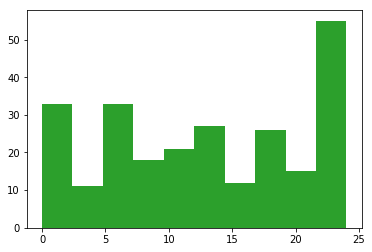

In [4]:
# While Iteration until Stop
    # Loop each sample
        # Loop each clusters and Assign most likely cluster
    # Loop each cluster
        # Compute Means
        
UPDATE_FLAG = True
clusters = {}
clusters_distribution = []
i = 0

while UPDATE_FLAG:
    UPDATE_FLAG = False
    count_FLAG = 0
    print("# {}th iteration...".format(i+1))
    
    for k, v in tqdm(jsons_.items()):
        c = v['cluster']
        d = v['distance']
        if d<0:
            jsons_[k]['distance'] = JaccardDist(clusters_means[c], v['text'])
            d = jsons_[k]['distance']

        for c_ in range(n_clusters):
            d_ = JaccardDist(clusters_means[c_], v['text'])
                
            if d_ < d:
                c = c_
                d = d_
                UPDATE_FLAG = True
                count_FLAG += 1
                
        clusters_distribution.append(c)
        jsons_[k]['cluster'] = c
        jsons_[k]['distance'] = d
        
        try:
            clusters[str(c)].append(v['text'])
        except:
            clusters[str(c)] = []
            clusters[str(c)].append(v['text'])
    
    for c in range(n_clusters):
        clusters_means[c] = computeMean(clusters[str(c)], 0.1)[0]
    
    print(count_FLAG)
    count_FLAG = 0
    plt.hist(clusters_distribution)
    clusters_distribution = []
    i += 1

In [32]:
clusters_txt = []
for i in range(n_clusters):
    line = '{}  '.format(i+1)
    ids = []
    for k, v in jsons_.items():
        if v['cluster'] == i:
            ids.append(k)
    ids = ','.join(ids)
    line += ids
    line += '\n'
    clusters_txt.append(line)

In [33]:
out_file = open('result.txt','w')
for i in range(n_clusters):
    out_file.write(clusters_txt[i])
#     out_file.write('\n------------------------------------------\n')